# Finding Numbers from images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

/home/jai/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jai/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/tmp/ipykernel_18523/2066171618.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print("Image Data Shape: ",digits.data.shape)
print("Label Data Shape: ",digits.target.shape)

Image Data Shape:  (1797, 64)
Label Data Shape:  (1797,)


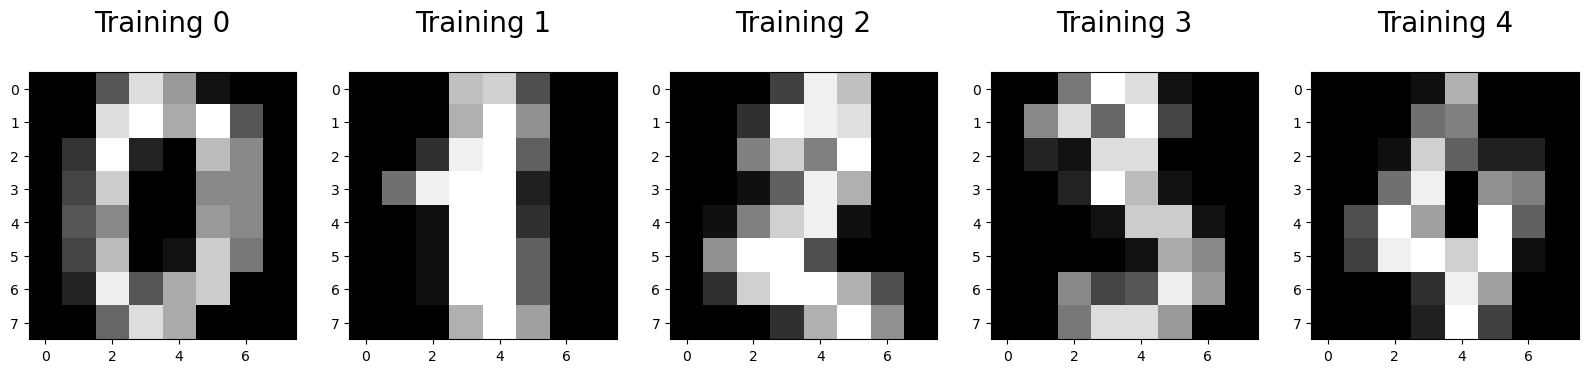

In [5]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training %i\n" %label, fontsize = 20)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [9]:
print(X_train.shape)

(1383, 64)


In [10]:
from sklearn.linear_model import LogisticRegression

logisticsrgr = LogisticRegression()
logisticsrgr.fit(X_train,y_train)

/home/jai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
print(logisticsrgr.predict(X_test[0].reshape(1,-1)))

[4]


In [13]:
predictions = logisticsrgr.predict(X_test)

In [14]:
score = logisticsrgr.score(X_test,y_test)
print(score)

0.9516908212560387


In [15]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy score: 0.9516908212560387')

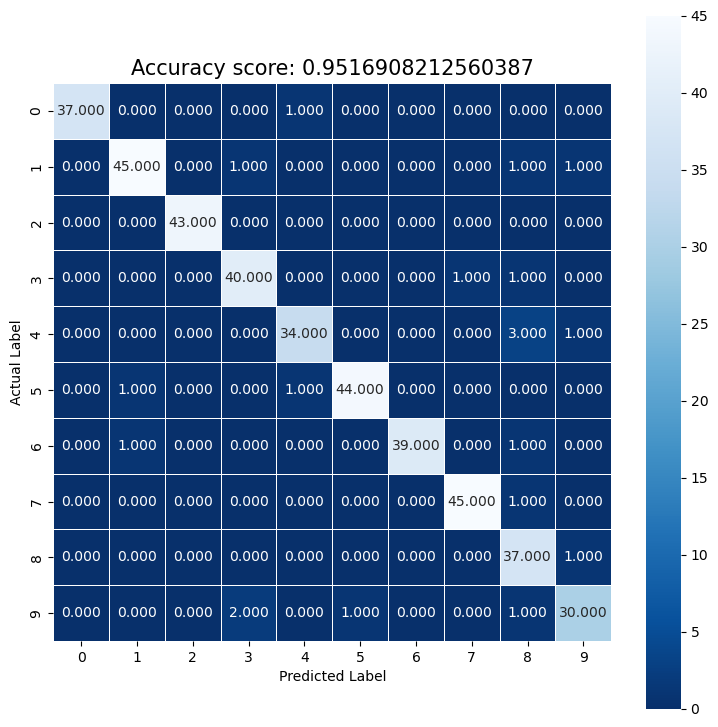

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title,size=15)
